In [1]:
# importing all useful functions 
import math
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
import gymnasium as gym
from gymnasium import Env, spaces, register, make
import random
import copy

In [2]:
class RandomMaze(Env):
    
    
    #----- 1 -----
    #constructor for initialization and some helper functions
    
    
    def __init__(self):
        
        #P is basically State: Action: [ Transition Probability , Next state , Reward , isTerminated?]
        # for actions : 0 -> up 1-> right 2->down 3-> left (clockwise)
        self.P = {
            0: {
                0: [(0.8, 0, -0.04, False),(0.1, 1, -0.04, False),(0.1, 0, -0.04, False)],
                1: [(0.8, 1, -0.04, False),(0.1, 0, -0.04, False),(0.1, 4, -0.04, False)],
                2: [(0.8, 4, -0.04, False),(0.1, 1, -0.04, False),(0.1, 0, -0.04, False)],
                3: [(0.8, 0, -0.04, False),(0.1, 0, -0.04, False),(0.1, 4, -0.04, False)]
            },
            1: {
                0: [(0.8, 1, -0.04, False),(0.1, 2, -0.04, False),(0.1, 0, -0.04, False)],
                1: [(0.8, 2, -0.04, False),(0.1, 1, -0.04, False),(0.1, 6, -0.04, False)],
                2: [(0.8, 1, -0.04, False),(0.1, 2, -0.04, False),(0.1, 0, -0.04, False)],
                3: [(0.8, 0, -0.04, False),(0.1, 1, -0.04, False),(0.1, 1, -0.04, False)]
            },
            2: {
                0: [(0.8, 2, -0.04, False),(0.1, 1, -0.04, False),(0.1, 3,  1.00, True)],
                1: [(0.8, 3,  1.00, True ),(0.1, 2, -0.04, False),(0.1, 6, -0.04, False)],
                2: [(0.8, 6, -0.04, False),(0.1, 1, -0.04, False),(0.1, 3,  1.00, True)],
                3: [(0.8, 1, -0.04, False),(0.1, 2, -0.04, False),(0.1, 6, -0.04, False)]
            },
            3: {
                0: [(1.0, 3, 0.00, True)],         # Goal
                1: [(1.0, 3, 0.00, True)],
                2: [(1.0, 3, 0.00, True)],
                3: [(1.0, 3, 0.00, True)]
            },
            4: {
                0: [(0.8, 0, -0.04, False),(0.1, 4, -0.04, False),(0.1, 4, -0.04, False)],
                1: [(0.8, 4, -0.04, False),(0.1, 0, -0.04, False),(0.1, 8, -0.04, False)],
                2: [(0.8, 8, -0.04, False),(0.1, 4, -0.04, False),(0.1, 4, -0.04, False)],
                3: [(0.8, 4, -0.04, False),(0.1, 0, -0.04, False),(0.1, 8, -0.04, False)]
            },
            5: {
                0: [(1.0, 5, 0.00, True)],
                1: [(1.0, 5, 0.00, True)],         # wall
                2: [(1.0, 5, 0.00, True)],
                3: [(1.0, 5, 0.00, True)]
            },
            6: {
                0: [(0.8, 2, -0.04, False),(0.1, 6, -0.04, False),(0.1, 7, -1.00,  True)],
                1: [(0.8, 7, -1.00, True ),(0.1, 2, -0.04, False),(0.1, 10, -0.04, False)],
                2: [(0.8, 10, -0.04,False),(0.1, 6, -0.04, False),(0.1, 7, -1.00,  True)],
                3: [(0.8, 6, -0.04, False),(0.1, 2, -0.04, False),(0.1, 10, -0.04, False)]
            },
            7: {
                0: [(1.0, 7, 0.00, True)],
                1: [(1.0, 7, 0.00, True)],        # hole
                2: [(1.0, 7, 0.00, True)],
                3: [(1.0, 7, 0.00, True)]
            },
            8: {
                0: [(0.8, 4, -0.04, False),(0.1, 9, -0.04, False),(0.1, 8, -0.04, False)],
                1: [(0.8, 9, -0.04, False),(0.1, 4, -0.04, False),(0.1, 8, -0.04, False)],
                2: [(0.8, 8, -0.04, False),(0.1, 8, -0.04, False),(0.1, 9, -0.04, False)],
                3: [(0.8, 8, -0.04, False),(0.1, 4, -0.04, False),(0.1, 8, -0.04, False)]
            },
            9: {
                0: [(0.8, 9, -0.04, False),(0.1, 10, -0.04, False),(0.1, 8, -0.04, False)],
                1: [(0.8, 10, -0.04, False),(0.1, 9, -0.04, False),(0.1, 9, -0.04, False)],
                2: [(0.8, 9, -0.04, False),(0.1, 8, -0.04, False),(0.1, 10, -0.04, False)],
                3: [(0.8, 8, -0.04, False),(0.1, 9, -0.04, False),(0.1, 9, -0.04, False)]
            },
            10: {
                0: [(0.8, 6, -0.04, False),(0.1, 9, -0.04, False),(0.1, 11, -0.04, False)],
                1: [(0.8, 11, -0.04, False),(0.1, 6, -0.04, False),(0.1, 10, -0.04, False)],
                2: [(0.8, 10, -0.04, False),(0.1, 11, -0.04, False),(0.1, 9, -0.04, False)],
                3: [(0.8, 9, -0.04, False),(0.1, 6, -0.04, False),(0.1, 10, -0.04, False)]
            },
            11: {
                0: [(0.8, 7, -1.00, True ),(0.1, 10, -0.04, False),(0.1, 11, -0.04, False)],
                1: [(0.8, 11, -0.04, False),(0.1, 11, -0.04, False),(0.1, 7, -1.00,  True)],
                2: [(0.8, 11, -0.04, False),(0.1, 10, -0.04, False),(0.1, 11, -0.04, False)],
                3: [(0.8, 10, -0.04,False),(0.1, 11, -0.04, False),(0.1, 7, -1.00,  True)]
            },
        }
        
        self.size = 12 # The size of the grid
        #self.window_size = 512  # The size of the PyGame window
        
        # We have 3 observations, corresponding to each position in the 1-D grid
        self.observation_space = spaces.Discrete(self.size)

        # We have 2 actions, corresponding to "left" & "right"
        self.action_space = spaces.Discrete(4)
        self.action_space_size_ = 4 
        
    
    #return the locations of agent and target
    def _get_obs(self):
        return {   
            "agent" : self.agent_location, 
            "target": self._target_location  
        }
    
    #returns the distance between agent and target 
    def _get_info(self):
        return {  
            "distance": abs(self.agent_location - self._target_location)   
        }
    
    
    
    
    #----- 2 ------
    # The reset function to initiate 
    
    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        
        self.agent_location = 8             #location of agent in the begining
        self._target_location = 3            #location of target  
        self._dead_state = 7                 #dead location
        
        
        observation = self._get_obs()        #getting useful information
        info = self._get_info()

        return observation,info
    
    
    
    
    
    #------- 3 ---------
    # The step function 
    
    def step(self, action):  # takes action as a parameter

        # gets the current location and stores the values from P set 
        prev_location = self.agent_location                                #gets location
        transitions = self.P[prev_location][action]                         #gets the corresponding action tuple
        probabilities, next_states, rewards, terminals = zip(*transitions)  #stores the value for use 
        
        # Randomly select a transition based on the probabilities
        # gives you random state based on your probabilities 
        index = random.choices(range(len(probabilities)), weights=probabilities, k=1)[0]
        # stores the values 
        self.agent_location, reward, terminated = next_states[index], rewards[index], terminals[index]
        
        truncated = False
        observation = self._get_obs()  
        info = self._get_info()

        info["log"] = {"current_state": prev_location, 
                       "action":action,  
                        "next_state": self.agent_location}

        # Return the required 5-tuple
        return observation, reward, terminated, truncated, info


In [3]:
# Register the custom environment
register(id='RMaze', entry_point=RandomMaze)

In [4]:
optimal_policy = [0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 2]

In [5]:
# Create and use the environment
environment = make('RMaze')

reward_sum = 0
observation = environment.reset(seed=0)
for _ in range(10):
    action = environment.action_space.sample()  # this is where you would insert your policy
    observation, reward, terminated, truncated, info = environment.step(action)
    reward_sum += reward
    print(info['log'])

    if terminated:
        print("Terminated", "\n")

    
    if terminated or truncated:
        observation = environment.reset(seed=0)
        
        
print(" Average Reward over 10 episode = " , (reward_sum * 0.1))

{'current_state': 8, 'action': 0, 'next_state': 4}
{'current_state': 4, 'action': 2, 'next_state': 4}
{'current_state': 4, 'action': 3, 'next_state': 4}
{'current_state': 4, 'action': 3, 'next_state': 4}
{'current_state': 4, 'action': 3, 'next_state': 4}
{'current_state': 4, 'action': 1, 'next_state': 4}
{'current_state': 4, 'action': 2, 'next_state': 8}
{'current_state': 8, 'action': 2, 'next_state': 9}
{'current_state': 9, 'action': 0, 'next_state': 9}
{'current_state': 9, 'action': 3, 'next_state': 8}
 Average Reward over 10 episode =  -0.04


/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `step()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN

In [170]:
def generateTrajectory( Env , policy , maxSteps , Q , epsilon ) :
    observation = environment.reset(seed=0)
    experience = []
    terminated = False
    steps=1
    curr_state=8
    action=0
    while not terminated :
        
        
        #action = policy[Env.agent_location]
        
        temp = np.random.random()
        if temp > epsilon[steps-1] :
            action=Q[curr_state].argmax()
        else :
            action=np.random.randint(0,4)
        
        
        
        observation, reward, terminated, truncated, info = environment.step(action)
        curr_state=info['log']['current_state']
        
        experience.append( (info['log']['current_state'],info['log']['action'],reward,info['log']['next_state']) )
        
        if terminated or truncated:
            observation = environment.reset(seed=0)
            return experience
            
        if steps > maxSteps :
            observation = environment.reset(seed=0)
            return []
        
        steps+=1
        
  

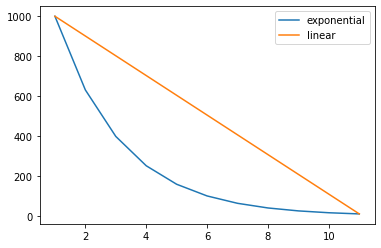

In [7]:
# decay-type : 0 -> linear decay , 1 -> exponential decay

def decayAlpha(initialValue, finalValue, maxSteps, decayType = 0) :
    ans=[initialValue]
    if decayType == 0 :
        
        steps= abs(finalValue-initialValue)/maxSteps 
        i = 1 
        value = initialValue
        while i <= maxSteps :
            value = value - steps
            ans.append(value)
            i+=1
        return ans
    
    else :
        
        factor =  (finalValue / initialValue) ** (1 / maxSteps) 
        i=1
        
        while i <= maxSteps :
            value = initialValue * (factor ** i)
            ans.append(value)
            i+=1
        
        return ans 
        
y_axis1 = decayAlpha(1000, 10, 10, 1)
y_axis2 = decayAlpha(1000, 10, 10, 0) 

x_axis = [i for i in range(1,12)]


plt.plot(x_axis, y_axis1 , label='exponential')
plt.plot(x_axis, y_axis2 , label='linear'      )

plt.legend()

#plt.savefig("qn22.png", format="png", dpi=300)
plt.show()

In [267]:
# Monte Carlo Control - FVMCC and EVMCC
#Monte Carlo First Visit -> firstVisit = True
#Monte Carlo Every Visit -> firstVisit = False 

def MonteCarloControl( Env , maxSteps , noEpisodes , alpha=0.1 , gamma=0.99, epsilon=0.3,  firstVisit=True):
    
    # initializations
    V_e   = np.zeros(Env.size)
    policy = np.zeros(Env.size)
    policy_matrix = np.zeros((noEpisodes , Env.size))
    Q_e = np.zeros((Env.size , Env.action_space_size_))
    Q   = np.zeros((noEpisodes , Env.size , Env.action_space_size_))
    V   = np.zeros((noEpisodes , Env.size) )
    visited=np.zeros((Env.size , Env.action_space_size_))
    
    observation = Env.reset(seed=0)
    alpha= decayAlpha(alpha, 0.01, noEpisodes , 1)
    epsilon = decayAlpha(epsilon, 0.0, maxSteps , 1)
    
    #algorithm
    for e in range(noEpisodes):
        
        observation = Env.reset(seed=0)
        
        t = generateTrajectory( Env , optimal_policy , maxSteps , Q_e , epsilon )
        visited[:,:]=False
        
        for i , (s,action,reward,nex) in enumerate(t):
            if visited[s][int(action)] and firstVisit :
                continue
            else :
                visited[s][int(action)]=True
            
            G=0
            j=i
            while j<len(t):
                G += ((gamma**(j-i))*(t[j][2]))
                j+=1
            
            Q_e[s][int(action)]+= alpha[e]*(G-Q_e[s][int(action)]) 
            
            
        Q[e]=Q_e
        V_e = np.max(Q_e , axis=1)
        V[e]= V_e
        
        c=0
        for i in Q_e :
            policy[c]=i.argmax()
            c+=1
        policy_matrix[e]=policy
    return  Q_e , Q , V ,V_e, policy , policy_matrix


environment = make('RMaze' )
observation = environment.reset(seed=0)
Q_e , Q , V , V_e, policy , policy_matrix = MonteCarloControl( environment, 100, 500 )
print(policy)
print(V_e)

[1. 1. 1. 0. 0. 0. 2. 0. 0. 3. 0. 3.]
[ 0.41168971  0.47755029  0.7158256   0.          0.31090119  0.
 -0.08749838  0.          0.22894465  0.01202539 -0.41304084 -0.04705766]


In [261]:
#SARSA ( TD Control )

def SARSA( Env , noEpisodes ,alpha=0.1 , gamma=0.99 ,epsilon=0.5):
    
    # initializations
    V_e   = np.zeros(Env.size)
    policy = np.zeros(Env.size)
    policy_matrix = np.zeros((noEpisodes , Env.size))
    Q_e = np.zeros((Env.size , Env.action_space_size_))
    Q   = np.zeros((noEpisodes , Env.size , Env.action_space_size_))
    V   = np.zeros((noEpisodes , Env.size) )
    
    observation = Env.reset(seed=0)

    alpha= decayAlpha(alpha, 0.01, noEpisodes , 0)
    epsilon = decayAlpha(epsilon, 0.0, noEpisodes+1 , 0)
    
    
    #algorithm
    for e in range(1,noEpisodes):
        
        observation = Env.reset(seed=0)
        terminated = False
        curr_state=8
        next_state=8
        curr_action = 0
        next_action = 0
        
        temp = np.random.rand(1)[0]
        if temp > epsilon[e] :
            curr_action=Q_e[curr_state].argmax()
        else :
            curr_action=np.random.randint(0,len(Q_e[curr_state]))
        
        
        while not terminated :
            observation, reward, terminated, truncated, info = Env.step(curr_action)
            
            
            temp = np.random.random()
            if temp > epsilon[e] :
                next_action=Q_e[next_state].argmax()
            else :
                next_action=np.random.randint(0,4)
            
            
            
            curr_state = info['log']['current_state']
            next_state = info['log']['next_state']
            td_target = reward
            if not terminated :
                td_target += gamma * Q_e[next_state][next_action]
                
            td_error=td_target-Q_e[curr_state][curr_action]
            
            
            Q_e[curr_state][curr_action]+=(alpha[e]*td_error)
            curr_action = next_action
            curr_state = next_state
            
        Q[e]=Q_e
        V_e = np.max(Q_e , axis=1)
        V[e]= V_e
        
        c=0
        for i in Q_e :
            policy[c]=i.argmax()
            c+=1
        policy_matrix[e]=policy
    return  Q_e , Q , V ,V_e, policy , policy_matrix


environment = make('RMaze' )
observation = environment.reset(seed=0)
Q_e , Q , V ,V_e, policy , policy_matrix= SARSA( environment, 1000 )
print(policy)
print(V_e)

[1. 1. 1. 0. 0. 0. 0. 0. 0. 3. 0. 1.]
[ 0.49210262  0.57785285  0.80999669  0.          0.37727422  0.
  0.39933358  0.          0.22683801 -0.05236806 -0.04281184 -0.31273815]


/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.size` for environment variables or `env.get_wrapper_attr('size')` that will search the reminding wrappers.
  logger.warn(
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/g

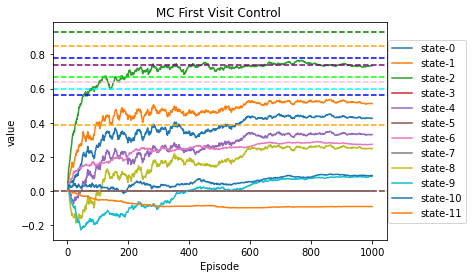

In [306]:
# Normal and Log plot for Monte Carlo FVC and EVC
# Monte Carlo First Visit -> firstVisit = True
# Monte Carlo Every Visit -> firstVisit = False 

# For getting log plot activate the plt.xscale('log') comment
ep =1000
arr = np.zeros((ep,12))
add = np.zeros((ep,12)) 
select =0
for i in range(20): 
    environment = make('RMaze')
    observation = environment.reset(seed=i)
    Q_e , Q , V , V_e, policy , policy_matrix = MonteCarloControl( environment, 100, ep , firstVisit=True)
    add , select = V , 1
    #add , select = Q[:,:,0] , 2
    #add , select = Q[:,:,1] , 3           # Release the comment accordingly to get the required plot
    #add , select= Q[:,:,2] , 4            # Also don't forget to add the comment to remove the previous plot
    #add , select = Q[:,:,3] , 5
    arr = arr + add

arr = arr/20
y_axis1=arr[:,0]
y_axis2=arr[:,1]
y_axis3=arr[:,2]
y_axis4=arr[:,3]
y_axis5=arr[:,4]
y_axis6=arr[:,5]
y_axis7=arr[:,6]
y_axis8=arr[:,7]
y_axis9=arr[:,8]
y_axis10=arr[:,9]
y_axis11=arr[:,10]
y_axis12=arr[:,11]
y_axis71=y_axis7
x_axis = np.linspace(1,ep,ep)    

true_8_MC = y_axis9
true_mean_MC = (y_axis1+y_axis2+y_axis3+y_axis4+y_axis5+y_axis6+y_axis7+y_axis8+y_axis9+y_axis10+y_axis11+y_axis12)
true_mean_MC=true_mean_MC/12

# Plot the data
plt.plot(x_axis, y_axis1, label='state-0')
plt.plot(x_axis, y_axis2, label='state-1')
plt.plot(x_axis, y_axis3, label='state-2')
plt.plot(x_axis, y_axis4, label='state-3')
plt.plot(x_axis, y_axis5, label='state-4')
plt.plot(x_axis, y_axis6, label='state-5')
plt.plot(x_axis, y_axis7, label='state-6')
plt.plot(x_axis, y_axis8, label='state-7')
plt.plot(x_axis, y_axis9, label='state-8')
plt.plot(x_axis, y_axis10, label='state-9')
plt.plot(x_axis, y_axis11, label='state-10')
plt.plot(x_axis, y_axis12, label='state-11')

# Add labels and legend
plt.title('MC First Visit Control ')
plt.xlabel('Episode')
#plt.ylabel('value')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

#true value displayer 
true_v = [ 0.78 ,  0.85, 0.93  , 0 ,  0.74 , 0 ,  0.64 , 0 ,  0.67 ,  0.60 ,  0.56 ,  0.39]
true_q0= [ 0.76 ,  0.82, 0.90  , 0 ,  0.74 , 0.,  0.64 , 0.,  0.67 ,  0.56 ,  0.55 , -0.71]
true_q1= [ 0.78 ,  0.85, 0.93  , 0.,  0.68 , 0., -0.68 , 0.,  0.58 ,  0.55 ,  0.40 ,  0.22]
true_q2= [ 0.71 ,  0.82, 0.69  , 0.,  0.64 , 0.,  0.38 , 0.,  0.62 ,  0.57 ,  0.53 ,  0.33]
true_q3= [ 0.74 ,  0.76, 0.80  , 0.,  0.68 , 0. , 0.57 , 0.,  0.63 ,  0.60 ,  0.56 ,  0.39]


if select==1 :
    true=true_v
    plt.ylabel('value')
elif select==2:
    true=true_q0
    plt.ylabel('Q-Action UP value')
elif select==3:
    true=true_q1
    plt.ylabel('Q-Action RIGHT value')
elif select==4:
    true=true_q2
    plt.ylabel('Q-Action DOWN value')
elif select==5:
    true=true_q3
    plt.ylabel('Q-Action LEFT value')
else :
    true=np.zeros(12)

plt.axhline(y = true[0], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[1], color = 'orange', linestyle = 'dashed')
plt.axhline(y = true[2], color = 'green', linestyle = 'dashed')
plt.axhline(y = true[3], color = 'red', linestyle = 'dashed')
plt.axhline(y = true[4], color = 'purple', linestyle = 'dashed')
plt.axhline(y = true[5], color = 'brown', linestyle = 'dashed')
plt.axhline(y = true[6], color = 'pink', linestyle = 'dashed')
plt.axhline(y = true[7], color = 'gray', linestyle = 'dashed')
plt.axhline(y = true[8], color = 'lime', linestyle = 'dashed')
plt.axhline(y = true[9], color = 'cyan', linestyle = 'dashed')
plt.axhline(y = true[10], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[11], color = 'orange', linestyle = 'dashed')

#plt.xscale('log')

#plt.savefig("qn315.png", format="png", dpi=300)

# Show the plot
plt.show()
    

/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.size` for environment variables or `env.get_wrapper_attr('size')` that will search the reminding wrappers.
  logger.warn(
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/g

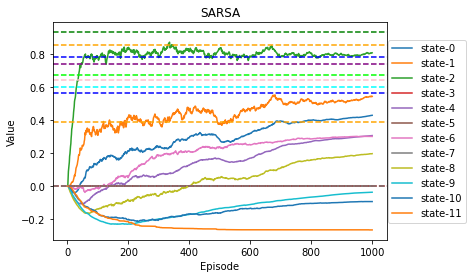

In [305]:
#Plot for SARSA 
ep = 1000  # no of episodes to run 
arr = np.zeros((ep,12))
add = np.zeros((ep,12)) 
select =0
for i in range(20): 
    environment = make('RMaze')
    observation = environment.reset(seed=i)
    Q_e , Q , V , V_e, policy , policy_matrix = SARSA( environment, ep )
    add , select = V , 1
    #add , select = Q[:,:,0] , 2
    #add , select = Q[:,:,1] , 3           # Release the comment accordingly to get the required plot
    #add , select= Q[:,:,2] , 4            # Also don't forget to add the comment to remove the previous plot
    #add , select = Q[:,:,3] , 5
    arr = arr + add

arr = arr/20
y_axis1=arr[:,0]
y_axis2=arr[:,1]
y_axis3=arr[:,2]
y_axis4=arr[:,3]
y_axis5=arr[:,4]
y_axis6=arr[:,5]
y_axis7=arr[:,6]
y_axis8=arr[:,7]
y_axis9=arr[:,8]
y_axis10=arr[:,9]
y_axis11=arr[:,10]
y_axis12=arr[:,11]
y_axis71=y_axis7
x_axis = np.linspace(1,ep,ep)    


true_8_SA = y_axis9
true_mean_SA = (y_axis1+y_axis2+y_axis3+y_axis4+y_axis5+y_axis6+y_axis7+y_axis8+y_axis9+y_axis10+y_axis11+y_axis12)/12


# Plot the data
plt.plot(x_axis, y_axis1, label='state-0')
plt.plot(x_axis, y_axis2, label='state-1')
plt.plot(x_axis, y_axis3, label='state-2')
plt.plot(x_axis, y_axis4, label='state-3')
plt.plot(x_axis, y_axis5, label='state-4')
plt.plot(x_axis, y_axis6, label='state-5')
plt.plot(x_axis, y_axis7, label='state-6')
plt.plot(x_axis, y_axis8, label='state-7')
plt.plot(x_axis, y_axis9, label='state-8')
plt.plot(x_axis, y_axis10, label='state-9')
plt.plot(x_axis, y_axis11, label='state-10')
plt.plot(x_axis, y_axis12, label='state-11')

# Add labels and legend
plt.title('SARSA')
plt.xlabel('Episode')
#plt.ylabel('Value')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

#true value displayer 
true_v = [ 0.78 ,  0.85, 0.93  , 0 ,  0.74 , 0 ,  0.64 , 0 ,  0.67 ,  0.60 ,  0.56 ,  0.39]
true_q0= [ 0.76 ,  0.82, 0.90  , 0 ,  0.74 , 0.,  0.64 , 0.,  0.67 ,  0.56 ,  0.55 , -0.71]
true_q1= [ 0.78 ,  0.85, 0.93  , 0.,  0.68 , 0., -0.68 , 0.,  0.58 ,  0.55 ,  0.40 ,  0.22]
true_q2= [ 0.71 ,  0.82, 0.69  , 0.,  0.64 , 0.,  0.38 , 0.,  0.62 ,  0.57 ,  0.53 ,  0.33]
true_q3= [ 0.74 ,  0.76, 0.80  , 0.,  0.68 , 0. , 0.57 , 0.,  0.63 ,  0.60 ,  0.56 ,  0.39]

if select==1 :
    true=true_v
    plt.ylabel('Value')
elif select==2:
    true=true_q0
    plt.ylabel('Q-Action UP value')
elif select==3:
    true=true_q1
    plt.ylabel('Q-Action RIGHT value')
elif select==4:
    true=true_q2
    plt.ylabel('Q-Action DOWN value')
elif select==5:
    true=true_q3
    plt.ylabel('Q-Action LEFT value')
else :
    true=np.zeros(12)

plt.axhline(y = true[0], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[1], color = 'orange', linestyle = 'dashed')
plt.axhline(y = true[2], color = 'green', linestyle = 'dashed')
plt.axhline(y = true[3], color = 'red', linestyle = 'dashed')
plt.axhline(y = true[4], color = 'purple', linestyle = 'dashed')
plt.axhline(y = true[5], color = 'brown', linestyle = 'dashed')
plt.axhline(y = true[6], color = 'pink', linestyle = 'dashed')
plt.axhline(y = true[7], color = 'gray', linestyle = 'dashed')
plt.axhline(y = true[8], color = 'lime', linestyle = 'dashed')
plt.axhline(y = true[9], color = 'cyan', linestyle = 'dashed')
plt.axhline(y = true[10], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[11], color = 'orange', linestyle = 'dashed')

#plt.xscale('log')

#plt.savefig("qn315.png", format="png", dpi=300)

# Show the plot
plt.show()
    

In [268]:
# Q Learning

def QLearning( Env , noEpisodes ,alpha=0.1 , gamma=0.99 ,epsilon=0.9):
    
    # initializations
    V_e   = np.zeros(Env.size)
    policy = np.zeros(Env.size)
    policy_matrix = np.zeros((noEpisodes , Env.size))
    Q_e = np.full((Env.size , Env.action_space_size_),0.0)
    Q   = np.zeros((noEpisodes , Env.size , Env.action_space_size_))
    V   = np.zeros((noEpisodes , Env.size) )
    
    observation = Env.reset(seed=0)

    alpha= decayAlpha(alpha, 0.01, noEpisodes , 1)
    epsilon = decayAlpha(epsilon, 0.1, noEpisodes+1 , 0)
    
    
    #algorithm
    for e in range(1,noEpisodes):
        
        observation = Env.reset(seed=0)
        terminated = False
        curr_state=8
        
        action = 0
        
        while not terminated :
            
            
            temp = np.random.random()
            if temp > epsilon[e] :
                action=Q_e[curr_state].argmax()
            else :
                action=np.random.randint(0,4)
            
            observation, reward, terminated, truncated, info = Env.step(action)
            
            
            curr_state = info['log']['current_state']
            td_target = reward
            
            
            if not terminated :
                td_target += gamma * np.max(Q_e[info['log']['next_state']])
                
            td_error=td_target-Q_e[info['log']['current_state']][action]
            
            
            Q_e[info['log']['current_state']][action]+=(alpha[e]*td_error)
            info['log']['current_state']=info['log']['next_state']
            curr_state = info['log']['current_state']
            
            
        Q[e]=Q_e
        V_e = np.max(Q_e , axis=1)
        V[e]= V_e
        
        c=0
        for i in Q_e :
            policy[c]=i.argmax()
            c+=1
        policy_matrix[e]=policy
    return  Q_e , Q , V ,V_e, policy , policy_matrix


environment = make('RMaze' )
observation = environment.reset(seed=0)
Q_e , Q , V ,V_e, policy,policy_matrix = QLearning( environment, 5000 )
print(policy)
print(V_e)

[1. 1. 1. 0. 0. 0. 0. 0. 0. 3. 3. 2.]
[0.82081992 0.88591335 0.95743034 0.         0.75945581 0.
 0.7188173  0.         0.69699155 0.63483817 0.55975479 0.27759908]


In [269]:
# Double Q Learning

def DoubleQLearning( Env , noEpisodes ,alpha=0.1 , gamma=0.99 ,epsilon=0.9):
    
    # initializations
    V_e   = np.zeros(Env.size)
    policy = np.zeros(Env.size)
    policy_matrix = np.zeros((noEpisodes , Env.size))
    Q_e_1 = np.zeros((Env.size , Env.action_space_size_))
    Q_e   = np.zeros((Env.size , Env.action_space_size_))
    Q_1  = np.zeros((noEpisodes , Env.size , Env.action_space_size_))
    Q_e_2 = np.zeros((Env.size , Env.action_space_size_))
    Q_2   = np.zeros((noEpisodes , Env.size , Env.action_space_size_))
    V   = np.zeros((noEpisodes , Env.size) )
    
    observation = Env.reset(seed=0)

    alpha= decayAlpha(alpha, 0.01, noEpisodes , 1)
    epsilon = decayAlpha(epsilon, 0.1, noEpisodes+1 , 1)
    
    count1=0
    count2=0
    
    #algorithm
    for e in range(1,noEpisodes):
        
        observation = Env.reset(seed=0)
        terminated = False
        curr_state=8
        
        action = 0
        
        while not terminated :
            
            
            temp = np.random.randint(0,1)
            if temp > epsilon[e] :
                action=Q_e[curr_state].argmax()
            else :
                action=np.random.randint(0,len(Q_e[curr_state]))
            
            observation, reward, terminated, truncated, info = Env.step(action)
            curr_state = info['log']['current_state']
            
            if random.randint(0,1):
                
                
                aq1=Q_e_1[info['log']['next_state']].argmax()
                
                td_target = reward
            
                if not terminated :
                    td_target += gamma * Q_e_2[info['log']['next_state']][aq1]
                
                td_error=td_target-Q_e_1[info['log']['current_state']][action]
            
            
                Q_e_1[info['log']['current_state']][action]+=(alpha[e]*td_error)
                
                
                
                
            else:
                
                
                aq2=Q_e_2[info['log']['next_state']].argmax()
                
                td_target = reward
            
                if not terminated :
                    td_target += gamma * Q_e_1[info['log']['next_state']][aq2]
                
                td_error=td_target-Q_e_2[info['log']['current_state']][action]
            
            
                Q_e_2[info['log']['current_state']][action]+=(alpha[e]*td_error)
                
                
                
                
                
                
            info['log']['current_state']=info['log']['next_state']
            curr_state = info['log']['current_state']
            
            
            
        Q_1[e]=Q_e_1
        Q_2[e]=Q_e_2
        Q_e = (Q_e_1 + Q_e_2)/2
        Q = (Q_1+Q_2)/2
        V_e = np.max(Q_e , axis=1)
        V[e]= V_e
        
        c=0
        for i in Q_e :
            policy[c]=i.argmax()
            c+=1
        policy_matrix[e]=policy
    
    return  Q_e , Q , V ,V_e, policy , policy_matrix


environment = make('RMaze' )
observation = environment.reset(seed=0)
Q_e , Q , V ,V_e, policy,policy_matrix= DoubleQLearning( environment, 1000 )
print(policy)
print(V_e)

[1. 1. 1. 0. 0. 0. 0. 0. 0. 3. 0. 3.]
[0.79894701 0.86500389 0.9527058  0.         0.73816852 0.
 0.69896314 0.         0.66790423 0.60412027 0.55815807 0.30947745]


/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.size` for environment variables or `env.get_wrapper_attr('size')` that will search the reminding wrappers.
  logger.warn(
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/g

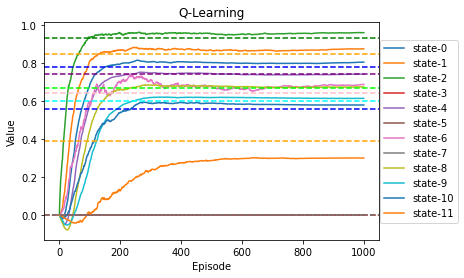

In [294]:
#Plot for Q-Learning 
ep = 1000  # no of episodes to run 
arr = np.zeros((ep,12))
add = np.zeros((ep,12)) 
select =0
for i in range(20): 
    environment = make('RMaze')
    observation = environment.reset(seed=i)
    Q_e , Q , V , V_e, policy,policy_matrix = QLearning( environment, ep )
    add , select = V , 1
    #add , select = Q[:,:,0] , 2
    #add , select = Q[:,:,1] , 3           # Release the comment accordingly to get the required plot
    #add , select= Q[:,:,2] , 4            # Also don't forget to add the comment to remove the previous plot
    #add , select = Q[:,:,3] , 5
    arr = arr + add

arr = arr/20
y_axis1=arr[:,0]
y_axis2=arr[:,1]
y_axis3=arr[:,2]
y_axis4=arr[:,3]
y_axis5=arr[:,4]
y_axis6=arr[:,5]
y_axis7=arr[:,6]
y_axis8=arr[:,7]
y_axis9=arr[:,8]
y_axis10=arr[:,9]
y_axis11=arr[:,10]
y_axis12=arr[:,11]
y_axis71=y_axis7
x_axis = np.linspace(1,ep,ep) 

true_8_Q = y_axis9
true_mean_Q = (y_axis1+y_axis2+y_axis3+y_axis4+y_axis5+y_axis6+y_axis7+y_axis8+y_axis9+y_axis10+y_axis11+y_axis12)/12


# Plot the data
plt.plot(x_axis, y_axis1, label='state-0')
plt.plot(x_axis, y_axis2, label='state-1')
plt.plot(x_axis, y_axis3, label='state-2')
plt.plot(x_axis, y_axis4, label='state-3')
plt.plot(x_axis, y_axis5, label='state-4')
plt.plot(x_axis, y_axis6, label='state-5')
plt.plot(x_axis, y_axis7, label='state-6')
plt.plot(x_axis, y_axis8, label='state-7')
plt.plot(x_axis, y_axis9, label='state-8')
plt.plot(x_axis, y_axis10, label='state-9')
plt.plot(x_axis, y_axis11, label='state-10')
plt.plot(x_axis, y_axis12, label='state-11')

# Add labels and legend
plt.title('Q-Learning')
plt.xlabel('Episode')
#plt.ylabel('Value')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

#true value displayer 
true_v = [ 0.78 ,  0.85, 0.93  , 0 ,  0.74 , 0 ,  0.64 , 0 ,  0.67 ,  0.60 ,  0.56 ,  0.39]
true_q0= [ 0.76 ,  0.82, 0.90  , 0 ,  0.74 , 0.,  0.64 , 0.,  0.67 ,  0.56 ,  0.55 , -0.71]
true_q1= [ 0.78 ,  0.85, 0.93  , 0.,  0.68 , 0., -0.68 , 0.,  0.58 ,  0.55 ,  0.40 ,  0.22]
true_q2= [ 0.71 ,  0.82, 0.69  , 0.,  0.64 , 0.,  0.38 , 0.,  0.62 ,  0.57 ,  0.53 ,  0.33]
true_q3= [ 0.74 ,  0.76, 0.80  , 0.,  0.68 , 0. , 0.57 , 0.,  0.63 ,  0.60 ,  0.56 ,  0.39]

if select==1 :
    true=true_v
    plt.ylabel('Value')
elif select==2:
    true=true_q0
    plt.ylabel('Q-Action UP value')
elif select==3:
    true=true_q1
    plt.ylabel('Q-Action RIGHT value')
elif select==4:
    true=true_q2
    plt.ylabel('Q-Action DOWN value')
elif select==5:
    true=true_q3
    plt.ylabel('Q-Action LEFT value')
else :
    true=np.zeros(12)

plt.axhline(y = true[0], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[1], color = 'orange', linestyle = 'dashed')
plt.axhline(y = true[2], color = 'green', linestyle = 'dashed')
plt.axhline(y = true[3], color = 'red', linestyle = 'dashed')
plt.axhline(y = true[4], color = 'purple', linestyle = 'dashed')
plt.axhline(y = true[5], color = 'brown', linestyle = 'dashed')
plt.axhline(y = true[6], color = 'pink', linestyle = 'dashed')
plt.axhline(y = true[7], color = 'gray', linestyle = 'dashed')
plt.axhline(y = true[8], color = 'lime', linestyle = 'dashed')
plt.axhline(y = true[9], color = 'cyan', linestyle = 'dashed')
plt.axhline(y = true[10], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[11], color = 'orange', linestyle = 'dashed')




#plt.xscale('log')

#plt.savefig("qn315.png", format="png", dpi=300)

# Show the plot
plt.show()

/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.size` for environment variables or `env.get_wrapper_attr('size')` that will search the reminding wrappers.
  logger.warn(
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/g

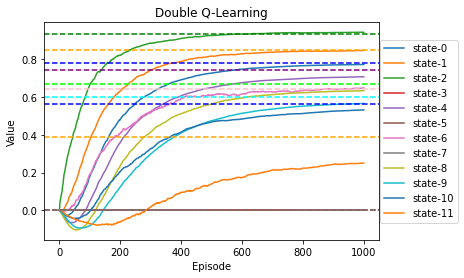

In [295]:
#Plot for Double Q-Learning 
ep = 1000  # no of episodes to run 
arr = np.zeros((ep,12))
add = np.zeros((ep,12)) 
select =0
for i in range(20): 
    environment = make('RMaze')
    observation = environment.reset(seed=i)
    Q_e , Q , V , V_e, policy, policy_matrix= DoubleQLearning( environment, ep )
    add , select = V , 1
    #add , select = Q[:,:,0] , 2
    #add , select = Q[:,:,1] , 3           # Release the comment accordingly to get the required plot
    #add , select= Q[:,:,2] , 4            # Also don't forget to add the comment to remove the previous plot
    #add , select = Q[:,:,3] , 5
    arr = arr + add

arr = arr/20
y_axis1=arr[:,0]
y_axis2=arr[:,1]
y_axis3=arr[:,2]
y_axis4=arr[:,3]
y_axis5=arr[:,4]
y_axis6=arr[:,5]
y_axis7=arr[:,6]
y_axis8=arr[:,7]
y_axis9=arr[:,8]
y_axis10=arr[:,9]
y_axis11=arr[:,10]
y_axis12=arr[:,11]
y_axis71=y_axis7
x_axis = np.linspace(1,ep,ep)    

true_8_DQ = y_axis9
true_mean_DQ = (y_axis1+y_axis2+y_axis3+y_axis4+y_axis5+y_axis6+y_axis7+y_axis8+y_axis9+y_axis10+y_axis11+y_axis12)/12


# Plot the data
plt.plot(x_axis, y_axis1, label='state-0')
plt.plot(x_axis, y_axis2, label='state-1')
plt.plot(x_axis, y_axis3, label='state-2')
plt.plot(x_axis, y_axis4, label='state-3')
plt.plot(x_axis, y_axis5, label='state-4')
plt.plot(x_axis, y_axis6, label='state-5')
plt.plot(x_axis, y_axis7, label='state-6')
plt.plot(x_axis, y_axis8, label='state-7')
plt.plot(x_axis, y_axis9, label='state-8')
plt.plot(x_axis, y_axis10, label='state-9')
plt.plot(x_axis, y_axis11, label='state-10')
plt.plot(x_axis, y_axis12, label='state-11')

# Add labels and legend
plt.title('Double Q-Learning')
plt.xlabel('Episode')
#plt.ylabel('Value')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

#true value displayer 
true_v = [ 0.78 ,  0.85, 0.93  , 0 ,  0.74 , 0 ,  0.64 , 0 ,  0.67 ,  0.60 ,  0.56 ,  0.39]
true_q0= [ 0.76 ,  0.82, 0.90  , 0 ,  0.74 , 0.,  0.64 , 0.,  0.67 ,  0.56 ,  0.55 , -0.71]
true_q1= [ 0.78 ,  0.85, 0.93  , 0.,  0.68 , 0., -0.68 , 0.,  0.58 ,  0.55 ,  0.40 ,  0.22]
true_q2= [ 0.71 ,  0.82, 0.69  , 0.,  0.64 , 0.,  0.38 , 0.,  0.62 ,  0.57 ,  0.53 ,  0.33]
true_q3= [ 0.74 ,  0.76, 0.80  , 0.,  0.68 , 0. , 0.57 , 0.,  0.63 ,  0.60 ,  0.56 ,  0.39]

if select==1 :
    true=true_v
    plt.ylabel('Value')
elif select==2:
    true=true_q0
    plt.ylabel('Q-Action UP value')
elif select==3:
    true=true_q1
    plt.ylabel('Q-Action RIGHT value')
elif select==4:
    true=true_q2
    plt.ylabel('Q-Action DOWN value')
elif select==5:
    true=true_q3
    plt.ylabel('Q-Action LEFT value')
else :
    true=np.zeros(12)

plt.axhline(y = true[0], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[1], color = 'orange', linestyle = 'dashed')
plt.axhline(y = true[2], color = 'green', linestyle = 'dashed')
plt.axhline(y = true[3], color = 'red', linestyle = 'dashed')
plt.axhline(y = true[4], color = 'purple', linestyle = 'dashed')
plt.axhline(y = true[5], color = 'brown', linestyle = 'dashed')
plt.axhline(y = true[6], color = 'pink', linestyle = 'dashed')
plt.axhline(y = true[7], color = 'gray', linestyle = 'dashed')
plt.axhline(y = true[8], color = 'lime', linestyle = 'dashed')
plt.axhline(y = true[9], color = 'cyan', linestyle = 'dashed')
plt.axhline(y = true[10], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[11], color = 'orange', linestyle = 'dashed')

#plt.xscale('log')

#plt.savefig("qn315.png", format="png", dpi=300)

# Show the plot
plt.show()

In [270]:
# SARSA Lambda Accumulating and Replacing Trace 
# Accumulating Trace -> replaceTrace=False
# Replacing trace -> replaceTrace=True

def SARSALambda(Env , noEpisodes , lamda = 0.1 , epsilon = 0.2 ,gamma=0.99 , alpha =0.1 , replaceTrace=False):
    
    
    # initializations
    V_e   = np.zeros(Env.size)
    policy = np.zeros(Env.size)
    policy_matrix = np.zeros((noEpisodes , Env.size))
    Q_e = np.zeros((Env.size , Env.action_space_size_))
    Q   = np.zeros((noEpisodes , Env.size , Env.action_space_size_))
    V   = np.zeros((noEpisodes , Env.size) )
    E   = np.zeros((Env.size , Env.action_space_size_))
    
    observation = Env.reset(seed=0)

    alpha= decayAlpha(alpha, 0.01, noEpisodes , 1)
    epsilon = decayAlpha(epsilon, 0.0, noEpisodes+1 , 0)
    
    
    for e in range(noEpisodes):
        
        E   = np.zeros((Env.size , Env.action_space_size_))
        observation = Env.reset(seed=0)
        curr_state = 8
        next_state = 8
        terminated = False 
        curr_action= 0
        next_action= 0
        flag = True # for s_dash-greedy
        
        temp = np.random.random()
        if temp > epsilon[e] :
            curr_action=Q_e[curr_state].argmax()
        else :
            curr_action=np.random.randint(0,len(Q_e[curr_state]))
        
        while not terminated:
            
            observation, reward, terminated, truncated, info = Env.step(curr_action)
            curr_state = info['log']['current_state']
            next_state = info['log']['next_state']
            
            temp = np.random.random()
            if temp > epsilon[e] :
                next_action=Q_e[next_state].argmax()
            else :
                next_action=np.random.randint(0,len(Q_e[next_state]))
            
            td_target = reward 
            
            if not terminated :
                td_target += (gamma * Q_e[next_state][next_action])
            
            td_error = td_target - Q_e[curr_state][curr_action]
            
            if replaceTrace == True:
                E[curr_state]=np.zeros(Env.action_space_size_)
            
            E[curr_state][curr_action] += 1
            Q_e += (alpha[e]*td_error*E)
            
            E = gamma*lamda*E
            
            info['log']['current_state']=info['log']['next_state']
            curr_state=info['log']['next_state']
            curr_action= next_action
            
            
        Q[e]=Q_e
        V_e = np.max(Q_e , axis=1)
        V[e]= V_e
        
        c=0
        for i in Q_e :
            policy[c]=i.argmax()
            c+=1
        policy_matrix[e]=policy
    return  Q_e , Q , V ,V_e, policy,policy_matrix

            
    
environment = make('RMaze' )
observation = environment.reset(seed=0)
Q_e , Q , V ,V_e, policy,policy_matrix = SARSALambda( environment, 500 )
print(policy)
print(V_e)

[1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
[ 0.73209245  0.82807876  0.92899061  0.          0.6486741   0.
  0.63379551  0.          0.51890237  0.19081779  0.38873741 -0.05974419]


In [288]:
# Q Lambda Accumulating and Replacing Trace 
# Accumulating Trace -> replaceTrace=False
# Replacing trace -> replaceTrace=True

def QLambda(Env , noEpisodes , lamda = 0.1 , epsilon = 0.9 ,gamma=0.99 , alpha =0.1 , replaceTrace=False):
    
    
    # initializations
    V_e   = np.zeros(Env.size)
    policy = np.zeros(Env.size)
    policy_matrix = np.zeros((noEpisodes , Env.size))
    Q_e = np.zeros((Env.size , Env.action_space_size_))
    Q   = np.zeros((noEpisodes , Env.size , Env.action_space_size_))
    V   = np.zeros((noEpisodes , Env.size) )
    E   = np.zeros((Env.size , Env.action_space_size_))
    
    observation = Env.reset(seed=0)

    alpha= decayAlpha(alpha, 0.01, noEpisodes , 1)
    epsilon = decayAlpha(epsilon, 0.1, noEpisodes+1 , 0)
    
    
    for e in range(noEpisodes):
        
        E   = np.zeros((Env.size , Env.action_space_size_))
        observation = Env.reset(seed=0)
        curr_state = 8
        next_state = 8
        terminated = False 
        curr_action= 0
        next_action= 0
        flag = True # for s_dash-greedy
        
        temp = np.random.randint(0,1)
        if temp > epsilon[e] :
            curr_action=Q_e[curr_state].argmax()
        else :
            curr_action=np.random.randint(0,len(Q_e[curr_state]))
        
        while not terminated:
            
            observation, reward, terminated, truncated, info = Env.step(curr_action)
            curr_state = info['log']['current_state']
            next_state = info['log']['next_state']
            
            temp = np.random.randint(0,1)
            if temp > epsilon[e] :
                next_action=Q_e[next_state].argmax()
            else :
                next_action=np.random.randint(0,len(Q_e[next_state]))
            
            if Q_e[next_state][next_action]==max(Q_e[next_state,:]):
                flag = True
            else :
                flag = False 
            
            td_target = reward 
            if not terminated :
                td_target += (gamma * max(Q_e[next_state,:]))
            
            td_error = td_target - Q_e[curr_state][curr_action]
            
            if replaceTrace == True:
                E[curr_state]=np.zeros(Env.action_space_size_)
            
            E[curr_state][curr_action] += 1
            Q_e += (alpha[e]*td_error*E)
            
            if flag:
                E = gamma*lamda*E
            else :
                E = np.zeros((Env.size , Env.action_space_size_))
            
            info['log']['current_state']=info['log']['next_state']
            curr_state=info['log']['next_state']
            curr_action= next_action
            
            
        Q[e]=Q_e
        V_e = np.max(Q_e , axis=1)
        V[e]= V_e
        
        c=0
        for i in Q_e :
            policy[c]=i.argmax()
            c+=1
        policy_matrix[e]=policy
    return  Q_e , Q , V ,V_e, policy,policy_matrix

            
    
environment = make('RMaze' )
observation = environment.reset(seed=0)
Q_e , Q , V ,V_e, policy ,policy_matrix= QLambda( environment, 500 )
print(policy)
print(V_e)

[1. 1. 1. 0. 0. 0. 0. 0. 0. 3. 0. 3.]
[0.79829805 0.85809983 0.94303266 0.         0.74243751 0.
 0.651392   0.         0.67779334 0.62035539 0.57703817 0.36180428]


In [289]:
# DYNA - Q

def dynaQ( Env, noEpisodes , noPlanning , alpha = 0.1 , gamma = 0.99 , epsilon= 0.9 ):
    
    # initializations
    V_e   = np.zeros(Env.size)
    policy = np.zeros(Env.size)
    policy_matrix = np.zeros((noEpisodes , Env.size))
    Q_e = np.zeros((Env.size , Env.action_space_size_))
    Q   = np.zeros((noEpisodes , Env.size , Env.action_space_size_))
    V   = np.zeros((noEpisodes , Env.size) )
    
    T   = np.zeros((Env.size , Env.action_space_size_ , Env.size))
    R   = np.zeros((Env.size , Env.action_space_size_ , Env.size))
    
    visited_state = []
    action_taken  = []
    observation = Env.reset(seed=0)

    alpha= decayAlpha(alpha, 0.01, noEpisodes , 1)
    epsilon = decayAlpha(epsilon, 0.1, noEpisodes+1 , 0)
    
    for e in range(noEpisodes):
        action = 0
        
        observation = Env.reset(seed=0)
        curr_state = 8
        next_state = 8
        terminated = False 
        
        while not terminated:
            
            temp = np.random.randint(0,1)
            if temp > epsilon[e] :
                action=Q_e[curr_state].argmax()
            else :
                action=np.random.randint(0,len(Q_e[curr_state]))
                
            observation, reward, terminated, truncated, info = Env.step(action)
            curr_state = info['log']['current_state']
            next_state = info['log']['next_state']
            visited_state.append(curr_state)
            action_taken.append(action)
            
            
            T[curr_state][action][next_state]+=1
            r_diff = reward - R[curr_state][action][next_state]
            R[curr_state][action][next_state] += (r_diff/T[curr_state][action][next_state])
            
            td_target = reward
            if not terminated :
                td_target += (gamma * max(Q_e[next_state,:]))
            td_error = td_target - Q_e[curr_state][action]
            
            Q_e[curr_state][action] += (alpha[e]*td_error)
            s_backup = next_state
            
            for _ in range(noPlanning):
                if np.sum(Q_e)==0 :
                    break
                
                s = random.choice(visited_state)
                a = random.choice(action_taken)
                
                prob = T[s][a]/np.sum(T[s,a,:])
                
                s_dash =random.choices(range(Env.size), weights=prob, k=1)
                
                r = R[s,a,s_dash]
                
                td_target=r+(gamma * max(Q_e[s_dash,:]))
                td_error = td_target - Q[s][a]
                Q[s,a]=Q[s,a]+(alpha[e]*td_error)
                
            curr_state = s_backup
                             
        Q[e]=Q_e
        V_e = np.max(Q_e , axis=1)
        V[e]= V_e
        
        c=0
        for i in Q_e :
            policy[c]=i.argmax()
            c+=1
        policy_matrix[e]=policy
    return  Q_e , Q , V ,V_e, policy,policy_matrix

            
    
environment = make('RMaze' )
observation = environment.reset(seed=0)
Q_e , Q , V ,V_e, policy,policy_matrix = dynaQ( environment, 500 ,10)
print(policy)
print(V_e)

/var/folders/sc/63b24d_x7_q7jtckgsd8mx000000gn/T/ipykernel_74094/930226634.py:65: RuntimeWarning: invalid value encountered in true_divide
  prob = T[s][a]/np.sum(T[s,a,:])


[1. 1. 1. 0. 0. 0. 0. 0. 0. 3. 3. 3.]
[0.78939441 0.85866903 0.94990514 0.         0.72992623 0.
 0.60755888 0.         0.65532996 0.59618682 0.52480784 0.26221654]


In [290]:
# Trajectory Sampling 

def TrajectorySampling( Env, noEpisodes , maxTrajectory ,alpha = 0.1 , gamma = 0.99 , epsilon= 0.9 ):
    
    # initializations
    V_e   = np.zeros(Env.size)
    policy = np.zeros(Env.size)
    policy_matrix = np.zeros((noEpisodes , Env.size))
    Q_e = np.zeros((Env.size , Env.action_space_size_))
    Q   = np.zeros((noEpisodes , Env.size , Env.action_space_size_))
    V   = np.zeros((noEpisodes , Env.size) )
    
    T   = np.zeros((Env.size , Env.action_space_size_ , Env.size))
    R   = np.zeros((Env.size , Env.action_space_size_ , Env.size))
    
    
    observation = Env.reset(seed=0)

    alpha= decayAlpha(alpha, 0.01, noEpisodes , 1)
    epsilon = decayAlpha(epsilon, 0.1, noEpisodes+1 , 1)
    
    for e in range(noEpisodes):
        action = 0
        
        observation = Env.reset(seed=0)
        curr_state = 8
        next_state = 8
        terminated = False 
        
        while not terminated:
            
            temp = np.random.randint(0,1)
            if temp > epsilon[e] :
                action=Q_e[curr_state].argmax()
            else :
                action=np.random.randint(0,len(Q_e[curr_state]))
                
            observation, reward, terminated, truncated, info = Env.step(action)
            curr_state = info['log']['current_state']
            next_state = info['log']['next_state']
            
            
            
            T[curr_state][action][next_state]+=1
            r_diff = reward - R[curr_state][action][next_state]
            R[curr_state][action][next_state] += (r_diff/T[curr_state][action][next_state])
            
            td_target = reward
            if not terminated :
                td_target += (gamma * max(Q_e[next_state,:]))
            td_error = td_target - Q_e[curr_state][action]
            
            Q_e[curr_state][action] += (alpha[e]*td_error)
            s_backup = next_state
            
            for _ in range(maxTrajectory):
                if np.sum(Q_e)==0 :
                    break
                
                a=0
                temp = np.random.randint(0,1)
                if temp > epsilon[e] :
                    a=Q_e[curr_state].argmax()
                else :
                    a=np.random.randint(0,len(Q_e[curr_state]))
                
                if not np.sum(T[curr_state,a]) :
                    break
                
                
                prob = T[curr_state][a]/np.sum(T[curr_state,a,:])
                
                s_dash =random.choices(range(Env.size), weights=prob, k=1)
                
                r = R[curr_state,a,s_dash]
                
                td_target=r+(gamma * max(Q_e[s_dash,:]))
                td_error = td_target - Q[curr_state][a]
                Q[curr_state,a]=Q[curr_state,a]+(alpha[e]*td_error)
                
            curr_state = s_backup
                             
        Q[e]=Q_e
        V_e = np.max(Q_e , axis=1)
        V[e]= V_e
        
        c=0
        for i in Q_e :
            policy[c]=i.argmax()
            c+=1
        policy_matrix[e]=policy
    return  Q_e , Q , V ,V_e, policy,policy_matrix

            
    
environment = make('RMaze' )
observation = environment.reset(seed=0)
Q_e , Q , V ,V_e, policy,policy_matrix = TrajectorySampling( environment, 500 ,10)
print(policy)
print(V_e)

[1. 1. 1. 0. 0. 0. 0. 0. 0. 3. 0. 3.]
[0.77850465 0.85115117 0.92890771 0.         0.71222956 0.
 0.75709154 0.         0.64053389 0.57704978 0.58494809 0.30745736]


/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.size` for environment variables or `env.get_wrapper_attr('size')` that will search the reminding wrappers.
  logger.warn(
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/g

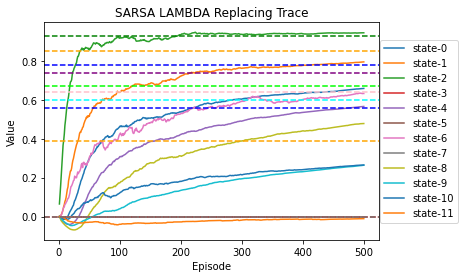

In [320]:
#Plot for SARSA Lambda 
ep = 500  # no of episodes to run 
arr = np.zeros((ep,12))
add = np.zeros((ep,12)) 
select =0
for i in range(20): 
    environment = make('RMaze')
    observation = environment.reset(seed=i)
    Q_e , Q , V , V_e, policy,policy_matrix = SARSALambda( environment, ep , replaceTrace=True )
    add , select = V , 1
    #add , select = Q[:,:,0] , 2
    #add , select = Q[:,:,1] , 3           # Release the comment accordingly to get the required plot
    #add , select= Q[:,:,2] , 4            # Also don't forget to add the comment to remove the previous plot
    #add , select = Q[:,:,3] , 5
    arr = arr + add

arr = arr/20
y_axis1=arr[:,0]
y_axis2=arr[:,1]
y_axis3=arr[:,2]
y_axis4=arr[:,3]
y_axis5=arr[:,4]
y_axis6=arr[:,5]
y_axis7=arr[:,6]
y_axis8=arr[:,7]
y_axis9=arr[:,8]
y_axis10=arr[:,9]
y_axis11=arr[:,10]
y_axis12=arr[:,11]
y_axis71=y_axis7
x_axis = np.linspace(1,ep,ep)    

# Plot the data
plt.plot(x_axis, y_axis1, label='state-0')
plt.plot(x_axis, y_axis2, label='state-1')
plt.plot(x_axis, y_axis3, label='state-2')
plt.plot(x_axis, y_axis4, label='state-3')
plt.plot(x_axis, y_axis5, label='state-4')
plt.plot(x_axis, y_axis6, label='state-5')
plt.plot(x_axis, y_axis7, label='state-6')
plt.plot(x_axis, y_axis8, label='state-7')
plt.plot(x_axis, y_axis9, label='state-8')
plt.plot(x_axis, y_axis10, label='state-9')
plt.plot(x_axis, y_axis11, label='state-10')
plt.plot(x_axis, y_axis12, label='state-11')


true_8_SAR = y_axis9
true_mean_SAR = (y_axis1+y_axis2+y_axis3+y_axis4+y_axis5+y_axis6+y_axis7+y_axis8+y_axis9+y_axis10+y_axis11+y_axis12)/12


# Add labels and legend
plt.title('SARSA LAMBDA Replacing Trace')
plt.xlabel('Episode')
#plt.ylabel('Value')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

#true value displayer 
true_v = [ 0.78 ,  0.85, 0.93  , 0 ,  0.74 , 0 ,  0.64 , 0 ,  0.67 ,  0.60 ,  0.56 ,  0.39]
true_q0= [ 0.76 ,  0.82, 0.90  , 0 ,  0.74 , 0.,  0.64 , 0.,  0.67 ,  0.56 ,  0.55 , -0.71]
true_q1= [ 0.78 ,  0.85, 0.93  , 0.,  0.68 , 0., -0.68 , 0.,  0.58 ,  0.55 ,  0.40 ,  0.22]
true_q2= [ 0.71 ,  0.82, 0.69  , 0.,  0.64 , 0.,  0.38 , 0.,  0.62 ,  0.57 ,  0.53 ,  0.33]
true_q3= [ 0.74 ,  0.76, 0.80  , 0.,  0.68 , 0. , 0.57 , 0.,  0.63 ,  0.60 ,  0.56 ,  0.39]

if select==1 :
    true=true_v
    plt.ylabel('Value')
elif select==2:
    true=true_q0
    plt.ylabel('Q-Action UP value')
elif select==3:
    true=true_q1
    plt.ylabel('Q-Action RIGHT value')
elif select==4:
    true=true_q2
    plt.ylabel('Q-Action DOWN value')
elif select==5:
    true=true_q3
    plt.ylabel('Q-Action LEFT value')
else :
    true=np.zeros(12)

plt.axhline(y = true[0], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[1], color = 'orange', linestyle = 'dashed')
plt.axhline(y = true[2], color = 'green', linestyle = 'dashed')
plt.axhline(y = true[3], color = 'red', linestyle = 'dashed')
plt.axhline(y = true[4], color = 'purple', linestyle = 'dashed')
plt.axhline(y = true[5], color = 'brown', linestyle = 'dashed')
plt.axhline(y = true[6], color = 'pink', linestyle = 'dashed')
plt.axhline(y = true[7], color = 'gray', linestyle = 'dashed')
plt.axhline(y = true[8], color = 'lime', linestyle = 'dashed')
plt.axhline(y = true[9], color = 'cyan', linestyle = 'dashed')
plt.axhline(y = true[10], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[11], color = 'orange', linestyle = 'dashed')

#plt.xscale('log')

#plt.savefig("qn315.png", format="png", dpi=300)

# Show the plot
plt.show()

In [319]:
true_8_SAA = true_8_SAR
true_mean_SAA = true_mean_SAR

/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.size` for environment variables or `env.get_wrapper_attr('size')` that will search the reminding wrappers.
  logger.warn(
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/g

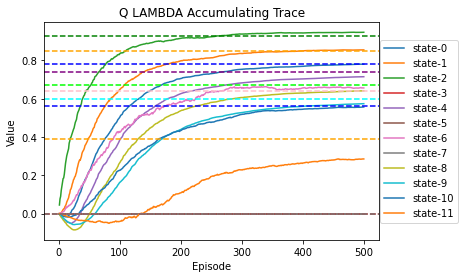

In [323]:
#Plot for Q Lambda 
ep = 500  # no of episodes to run 
arr = np.zeros((ep,12))
add = np.zeros((ep,12)) 
select =0
for i in range(20): 
    environment = make('RMaze')
    observation = environment.reset(seed=i)
    Q_e , Q , V , V_e, policy,policy_matrix = QLambda( environment, ep , replaceTrace=True )
    add , select = V , 1
    #add , select = Q[:,:,0] , 2
    #add , select = Q[:,:,1] , 3           # Release the comment accordingly to get the required plot
    #add , select= Q[:,:,2] , 4            # Also don't forget to add the comment to remove the previous plot
    #add , select = Q[:,:,3] , 5
    arr = arr + add

arr = arr/20
y_axis1=arr[:,0]
y_axis2=arr[:,1]
y_axis3=arr[:,2]
y_axis4=arr[:,3]
y_axis5=arr[:,4]
y_axis6=arr[:,5]
y_axis7=arr[:,6]
y_axis8=arr[:,7]
y_axis9=arr[:,8]
y_axis10=arr[:,9]
y_axis11=arr[:,10]
y_axis12=arr[:,11]
y_axis71=y_axis7
x_axis = np.linspace(1,ep,ep)    

# Plot the data
plt.plot(x_axis, y_axis1, label='state-0')
plt.plot(x_axis, y_axis2, label='state-1')
plt.plot(x_axis, y_axis3, label='state-2')
plt.plot(x_axis, y_axis4, label='state-3')
plt.plot(x_axis, y_axis5, label='state-4')
plt.plot(x_axis, y_axis6, label='state-5')
plt.plot(x_axis, y_axis7, label='state-6')
plt.plot(x_axis, y_axis8, label='state-7')
plt.plot(x_axis, y_axis9, label='state-8')
plt.plot(x_axis, y_axis10, label='state-9')
plt.plot(x_axis, y_axis11, label='state-10')
plt.plot(x_axis, y_axis12, label='state-11')

true_8_QR = y_axis9
true_mean_QR = (y_axis1+y_axis2+y_axis3+y_axis4+y_axis5+y_axis6+y_axis7+y_axis8+y_axis9+y_axis10+y_axis11+y_axis12)/12


# Add labels and legend
plt.title('Q LAMBDA Accumulating Trace')
plt.xlabel('Episode')
#plt.ylabel('Value')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

#true value displayer 
true_v = [ 0.78 ,  0.85, 0.93  , 0 ,  0.74 , 0 ,  0.64 , 0 ,  0.67 ,  0.60 ,  0.56 ,  0.39]
true_q0= [ 0.76 ,  0.82, 0.90  , 0 ,  0.74 , 0.,  0.64 , 0.,  0.67 ,  0.56 ,  0.55 , -0.71]
true_q1= [ 0.78 ,  0.85, 0.93  , 0.,  0.68 , 0., -0.68 , 0.,  0.58 ,  0.55 ,  0.40 ,  0.22]
true_q2= [ 0.71 ,  0.82, 0.69  , 0.,  0.64 , 0.,  0.38 , 0.,  0.62 ,  0.57 ,  0.53 ,  0.33]
true_q3= [ 0.74 ,  0.76, 0.80  , 0.,  0.68 , 0. , 0.57 , 0.,  0.63 ,  0.60 ,  0.56 ,  0.39]

if select==1 :
    true=true_v
    plt.ylabel('Value')
elif select==2:
    true=true_q0
    plt.ylabel('Q-Action UP value')
elif select==3:
    true=true_q1
    plt.ylabel('Q-Action RIGHT value')
elif select==4:
    true=true_q2
    plt.ylabel('Q-Action DOWN value')
elif select==5:
    true=true_q3
    plt.ylabel('Q-Action LEFT value')
else :
    true=np.zeros(12)

plt.axhline(y = true[0], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[1], color = 'orange', linestyle = 'dashed')
plt.axhline(y = true[2], color = 'green', linestyle = 'dashed')
plt.axhline(y = true[3], color = 'red', linestyle = 'dashed')
plt.axhline(y = true[4], color = 'purple', linestyle = 'dashed')
plt.axhline(y = true[5], color = 'brown', linestyle = 'dashed')
plt.axhline(y = true[6], color = 'pink', linestyle = 'dashed')
plt.axhline(y = true[7], color = 'gray', linestyle = 'dashed')
plt.axhline(y = true[8], color = 'lime', linestyle = 'dashed')
plt.axhline(y = true[9], color = 'cyan', linestyle = 'dashed')
plt.axhline(y = true[10], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[11], color = 'orange', linestyle = 'dashed')

#plt.xscale('log')

#plt.savefig("qn315.png", format="png", dpi=300)

# Show the plot
plt.show()

In [322]:
true_8_QA = true_8_QR
true_mean_QA = true_mean_QR


/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.size` for environment variables or `env.get_wrapper_attr('size')` that will search the reminding wrappers.
  logger.warn(
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/g

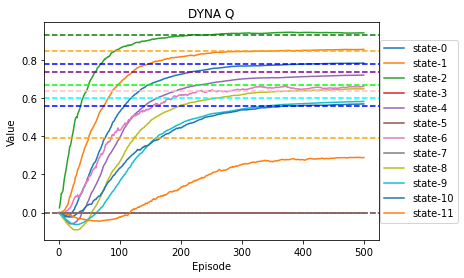

In [315]:
#Plot for DYNA Q 
ep = 500  # no of episodes to run 
arr = np.zeros((ep,12))
add = np.zeros((ep,12)) 
select =0
for i in range(20): 
    environment = make('RMaze')
    observation = environment.reset(seed=i)
    Q_e , Q , V , V_e, policy,policy_matrix = dynaQ( environment, ep ,10)
    add , select = V , 1
    #add , select = Q[:,:,0] , 2
    #add , select = Q[:,:,1] , 3           # Release the comment accordingly to get the required plot
    #add , select= Q[:,:,2] , 4            # Also don't forget to add the comment to remove the previous plot
    #add , select = Q[:,:,3] , 5
    arr = arr + add

arr = arr/20
y_axis1=arr[:,0]
y_axis2=arr[:,1]
y_axis3=arr[:,2]
y_axis4=arr[:,3]
y_axis5=arr[:,4]
y_axis6=arr[:,5]
y_axis7=arr[:,6]
y_axis8=arr[:,7]
y_axis9=arr[:,8]
y_axis10=arr[:,9]
y_axis11=arr[:,10]
y_axis12=arr[:,11]
y_axis71=y_axis7
x_axis = np.linspace(1,ep,ep)    

# Plot the data
plt.plot(x_axis, y_axis1, label='state-0')
plt.plot(x_axis, y_axis2, label='state-1')
plt.plot(x_axis, y_axis3, label='state-2')
plt.plot(x_axis, y_axis4, label='state-3')
plt.plot(x_axis, y_axis5, label='state-4')
plt.plot(x_axis, y_axis6, label='state-5')
plt.plot(x_axis, y_axis7, label='state-6')
plt.plot(x_axis, y_axis8, label='state-7')
plt.plot(x_axis, y_axis9, label='state-8')
plt.plot(x_axis, y_axis10, label='state-9')
plt.plot(x_axis, y_axis11, label='state-10')
plt.plot(x_axis, y_axis12, label='state-11')

true_8_QD = y_axis9
true_mean_QD = (y_axis1+y_axis2+y_axis3+y_axis4+y_axis5+y_axis6+y_axis7+y_axis8+y_axis9+y_axis10+y_axis11+y_axis12)/12


# Add labels and legend
plt.title('DYNA Q')
plt.xlabel('Episode')
#plt.ylabel('Value')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

#true value displayer 
true_v = [ 0.78 ,  0.85, 0.93  , 0 ,  0.74 , 0 ,  0.64 , 0 ,  0.67 ,  0.60 ,  0.56 ,  0.39]
true_q0= [ 0.76 ,  0.82, 0.90  , 0 ,  0.74 , 0.,  0.64 , 0.,  0.67 ,  0.56 ,  0.55 , -0.71]
true_q1= [ 0.78 ,  0.85, 0.93  , 0.,  0.68 , 0., -0.68 , 0.,  0.58 ,  0.55 ,  0.40 ,  0.22]
true_q2= [ 0.71 ,  0.82, 0.69  , 0.,  0.64 , 0.,  0.38 , 0.,  0.62 ,  0.57 ,  0.53 ,  0.33]
true_q3= [ 0.74 ,  0.76, 0.80  , 0.,  0.68 , 0. , 0.57 , 0.,  0.63 ,  0.60 ,  0.56 ,  0.39]

if select==1 :
    true=true_v
    plt.ylabel('Value')
elif select==2:
    true=true_q0
    plt.ylabel('Q-Action UP value')
elif select==3:
    true=true_q1
    plt.ylabel('Q-Action RIGHT value')
elif select==4:
    true=true_q2
    plt.ylabel('Q-Action DOWN value')
elif select==5:
    true=true_q3
    plt.ylabel('Q-Action LEFT value')
else :
    true=np.zeros(12)

plt.axhline(y = true[0], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[1], color = 'orange', linestyle = 'dashed')
plt.axhline(y = true[2], color = 'green', linestyle = 'dashed')
plt.axhline(y = true[3], color = 'red', linestyle = 'dashed')
plt.axhline(y = true[4], color = 'purple', linestyle = 'dashed')
plt.axhline(y = true[5], color = 'brown', linestyle = 'dashed')
plt.axhline(y = true[6], color = 'pink', linestyle = 'dashed')
plt.axhline(y = true[7], color = 'gray', linestyle = 'dashed')
plt.axhline(y = true[8], color = 'lime', linestyle = 'dashed')
plt.axhline(y = true[9], color = 'cyan', linestyle = 'dashed')
plt.axhline(y = true[10], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[11], color = 'orange', linestyle = 'dashed')

#plt.xscale('log')

#plt.savefig("qn315.png", format="png", dpi=300)

# Show the plot
plt.show()

/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'dict'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.size` for environment variables or `env.get_wrapper_attr('size')` that will search the reminding wrappers.
  logger.warn(
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/g

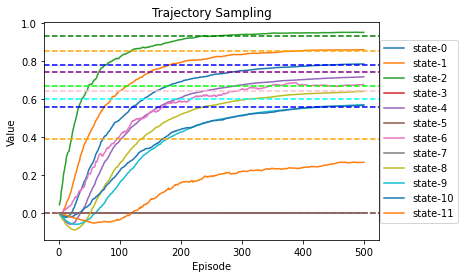

In [316]:
#Plot for Trajectory Sampling 
ep = 500  # no of episodes to run 
arr = np.zeros((ep,12))
add = np.zeros((ep,12)) 
select =0
for i in range(20): 
    environment = make('RMaze')
    observation = environment.reset(seed=i)
    Q_e , Q , V , V_e, policy,policy_matrix = TrajectorySampling( environment, ep ,10)
    add , select = V , 1
    #add , select = Q[:,:,0] , 2
    #add , select = Q[:,:,1] , 3           # Release the comment accordingly to get the required plot
    #add , select= Q[:,:,2] , 4            # Also don't forget to add the comment to remove the previous plot
    #add , select = Q[:,:,3] , 5
    arr = arr + add

arr = arr/20
y_axis1=arr[:,0]
y_axis2=arr[:,1]
y_axis3=arr[:,2]
y_axis4=arr[:,3]
y_axis5=arr[:,4]
y_axis6=arr[:,5]
y_axis7=arr[:,6]
y_axis8=arr[:,7]
y_axis9=arr[:,8]
y_axis10=arr[:,9]
y_axis11=arr[:,10]
y_axis12=arr[:,11]
y_axis71=y_axis7
x_axis = np.linspace(1,ep,ep)    

true_8_TS = y_axis9
true_mean_TS = (y_axis1+y_axis2+y_axis3+y_axis4+y_axis5+y_axis6+y_axis7+y_axis8+y_axis9+y_axis10+y_axis11+y_axis12)/12


# Plot the data
plt.plot(x_axis, y_axis1, label='state-0')
plt.plot(x_axis, y_axis2, label='state-1')
plt.plot(x_axis, y_axis3, label='state-2')
plt.plot(x_axis, y_axis4, label='state-3')
plt.plot(x_axis, y_axis5, label='state-4')
plt.plot(x_axis, y_axis6, label='state-5')
plt.plot(x_axis, y_axis7, label='state-6')
plt.plot(x_axis, y_axis8, label='state-7')
plt.plot(x_axis, y_axis9, label='state-8')
plt.plot(x_axis, y_axis10, label='state-9')
plt.plot(x_axis, y_axis11, label='state-10')
plt.plot(x_axis, y_axis12, label='state-11')

# Add labels and legend
plt.title('Trajectory Sampling')
plt.xlabel('Episode')
#plt.ylabel('Value')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

#true value displayer 
true_v = [ 0.78 ,  0.85, 0.93  , 0 ,  0.74 , 0 ,  0.64 , 0 ,  0.67 ,  0.60 ,  0.56 ,  0.39]
true_q0= [ 0.76 ,  0.82, 0.90  , 0 ,  0.74 , 0.,  0.64 , 0.,  0.67 ,  0.56 ,  0.55 , -0.71]
true_q1= [ 0.78 ,  0.85, 0.93  , 0.,  0.68 , 0., -0.68 , 0.,  0.58 ,  0.55 ,  0.40 ,  0.22]
true_q2= [ 0.71 ,  0.82, 0.69  , 0.,  0.64 , 0.,  0.38 , 0.,  0.62 ,  0.57 ,  0.53 ,  0.33]
true_q3= [ 0.74 ,  0.76, 0.80  , 0.,  0.68 , 0. , 0.57 , 0.,  0.63 ,  0.60 ,  0.56 ,  0.39]

if select==1 :
    true=true_v
    plt.ylabel('Value')
elif select==2:
    true=true_q0
    plt.ylabel('Q-Action UP value')
elif select==3:
    true=true_q1
    plt.ylabel('Q-Action RIGHT value')
elif select==4:
    true=true_q2
    plt.ylabel('Q-Action DOWN value')
elif select==5:
    true=true_q3
    plt.ylabel('Q-Action LEFT value')
else :
    true=np.zeros(12)

plt.axhline(y = true[0], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[1], color = 'orange', linestyle = 'dashed')
plt.axhline(y = true[2], color = 'green', linestyle = 'dashed')
plt.axhline(y = true[3], color = 'red', linestyle = 'dashed')
plt.axhline(y = true[4], color = 'purple', linestyle = 'dashed')
plt.axhline(y = true[5], color = 'brown', linestyle = 'dashed')
plt.axhline(y = true[6], color = 'pink', linestyle = 'dashed')
plt.axhline(y = true[7], color = 'gray', linestyle = 'dashed')
plt.axhline(y = true[8], color = 'lime', linestyle = 'dashed')
plt.axhline(y = true[9], color = 'cyan', linestyle = 'dashed')
plt.axhline(y = true[10], color = 'blue', linestyle = 'dashed')
plt.axhline(y = true[11], color = 'orange', linestyle = 'dashed')

#plt.xscale('log')

#plt.savefig("qn315.png", format="png", dpi=300)

# Show the plot
plt.show()

/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.size` for environment variables or `env.get_wrapper_attr('size')` that will search the reminding wrappers.
  logger.warn(
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.action_space_size_ to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.action_space_size_` for environment variables or `env.get_wrapper_attr('action_space_size_')` that will search the reminding wrappers.
  logger.warn(
/Users/kislayadityaoj/opt/anaconda3/lib/python3.9/site-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'dict'>
  lo

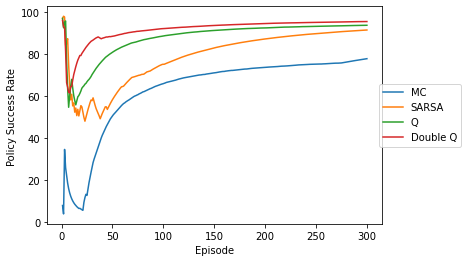

In [286]:
# Policy success rate plot for MCFVCC , SARSA , Q and Double Q

def getPolicySuccessRate(Env , current_policy , goalState = 3 , maxEpisodes = 100 , maxSteps = 200) :
    
    observation = Env.reset(seed=0)
    curr_state = 8
    num = 0
    for i in range(maxEpisodes) :
        observation = Env.reset(seed=0)
        curr_state = 8
        for j in range(maxSteps) :
            
            action = current_policy[curr_state]
            observation, reward, terminated, truncated, info = Env.step(action)
            
            if reward == 1 :
                num+=1
            curr_state = info['log']['next_state']
            
            if terminated or truncated:
                break
            
    return  num   
            
            
env = make('RMaze')
ep = 300

Q_e , Q , V , V_e, policy , policy_matrix = MonteCarloControl( env, 200, ep , firstVisit=True)
y_axis_MC = np.zeros(ep)
for i in range(ep):
    current_policy = policy_matrix[i]
    value = getPolicySuccessRate(env , current_policy)
    if i==0 :
        y_axis_MC[i]=value
        continue
    y_axis_MC[i]= (value + (y_axis_MC[i-1] * i))/(i+1)


Q_e , Q , V ,V_e, policy , policy_matrix= SARSA( env, ep )
y_axis_S = np.zeros(ep)
for i in range(ep):
    current_policy = policy_matrix[i]
    value = getPolicySuccessRate(env , current_policy)
    if i==0 :
        y_axis_S[i]=value
        continue
    y_axis_S[i]= (value + (y_axis_S[i-1] * i))/(i+1)
    
    
Q_e , Q , V , V_e, policy,policy_matrix = QLearning( env, ep )
y_axis_Q = np.zeros(ep)
for i in range(ep):
    current_policy = policy_matrix[i]
    value = getPolicySuccessRate(env , current_policy)
    if i==0 :
        y_axis_Q[i]=value
        continue
    y_axis_Q[i]= (value + (y_axis_Q[i-1] * i))/(i+1)

    
Q_e , Q , V , V_e, policy, policy_matrix= DoubleQLearning( env, ep )
y_axis_DQ = np.zeros(ep)
for i in range(ep):
    current_policy = policy_matrix[i]
    value = getPolicySuccessRate(env , current_policy)
    if i==0 :
        y_axis_DQ[i]=value
        continue
    y_axis_DQ[i]= (value + (y_axis_DQ[i-1] * i))/(i+1)
    
    
x_axis = np.linspace(1,ep,ep) 

plt.plot(x_axis, y_axis_MC , label='MC')
plt.plot(x_axis, y_axis_S, label='SARSA')
plt.plot(x_axis, y_axis_Q, label='Q')
plt.plot(x_axis, y_axis_DQ, label='Double Q')

plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

plt.xlabel('Episode')
plt.ylabel('Policy Success Rate ')

plt.show()

/var/folders/sc/63b24d_x7_q7jtckgsd8mx000000gn/T/ipykernel_74094/930226634.py:65: RuntimeWarning: invalid value encountered in true_divide
  prob = T[s][a]/np.sum(T[s,a,:])


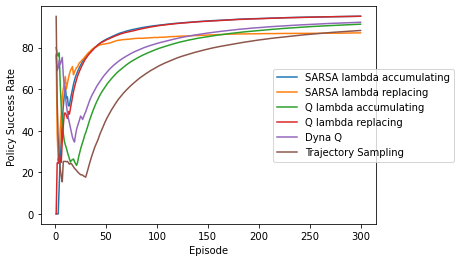

In [291]:
# Policy success rate plot for SARSA lambda(accu and repla)  , Q lambda(accu and repla) , dyna q and trajectory sam
environment = make('RMaze')
ep = 300

Q_e , Q , V , V_e, policy,policy_matrix = SARSALambda( environment, ep , replaceTrace=False )
y_axis_SLA = np.zeros(ep)
for i in range(ep):
    current_policy = policy_matrix[i]
    value = getPolicySuccessRate(env , current_policy)
    if i==0 :
        y_axis_SLA[i]=value
        continue
    y_axis_SLA[i]= (value + (y_axis_SLA[i-1] * i))/(i+1)


Q_e , Q , V , V_e, policy,policy_matrix = SARSALambda( environment, ep , replaceTrace=True )
y_axis_SLR = np.zeros(ep)
for i in range(ep):
    current_policy = policy_matrix[i]
    value = getPolicySuccessRate(env , current_policy)
    if i==0 :
        y_axis_SLR[i]=value
        continue
    y_axis_SLR[i]= (value + (y_axis_SLR[i-1] * i))/(i+1)
    
    
Q_e , Q , V , V_e, policy,policy_matrix = QLambda( environment, ep , replaceTrace=False )
y_axis_QLA = np.zeros(ep)
for i in range(ep):
    current_policy = policy_matrix[i]
    value = getPolicySuccessRate(env , current_policy)
    if i==0 :
        y_axis_QLA[i]=value
        continue
    y_axis_QLA[i]= (value + (y_axis_QLA[i-1] * i))/(i+1)

    
Q_e , Q , V , V_e, policy,policy_matrix = QLambda( environment, ep , replaceTrace=True )
y_axis_QLR = np.zeros(ep)
for i in range(ep):
    current_policy = policy_matrix[i]
    value = getPolicySuccessRate(env , current_policy)
    if i==0 :
        y_axis_QLR[i]=value
        continue
    y_axis_QLR[i]= (value + (y_axis_QLR[i-1] * i))/(i+1)
    
Q_e , Q , V , V_e, policy,policy_matrix = dynaQ( environment, ep ,10)
y_axis_DYQ = np.zeros(ep)
for i in range(ep):
    current_policy = policy_matrix[i]
    value = getPolicySuccessRate(env , current_policy)
    if i==0 :
        y_axis_DYQ[i]=value
        continue
    y_axis_DYQ[i]= (value + (y_axis_DYQ[i-1] * i))/(i+1)
    
Q_e , Q , V , V_e, policy,policy_matrix = TrajectorySampling( environment, ep ,10)
y_axis_TS = np.zeros(ep)
for i in range(ep):
    current_policy = policy_matrix[i]
    value = getPolicySuccessRate(env , current_policy)
    if i==0 :
        y_axis_TS[i]=value
        continue
    y_axis_TS[i]= (value + (y_axis_TS[i-1] * i))/(i+1)
    
    
x_axis = np.linspace(1,ep,ep) 

plt.plot(x_axis, y_axis_SLA , label='SARSA lambda accumulating')
plt.plot(x_axis, y_axis_SLR, label='SARSA lambda replacing')
plt.plot(x_axis, y_axis_QLA, label='Q lambda accumulating')
plt.plot(x_axis, y_axis_QLR, label='Q lambda replacing')
plt.plot(x_axis, y_axis_DYQ, label='Dyna Q')
plt.plot(x_axis, y_axis_TS, label='Trajectory Sampling')


plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

plt.xlabel('Episode')
plt.ylabel('Policy Success Rate ')

plt.show()

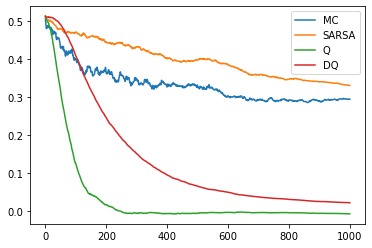

In [307]:
# Plotting the mean absolute error of true values 

true_v = np.array([ 0.78 ,  0.85, 0.93  , 0 ,  0.74 , 0 ,  0.64 , 0 ,  0.67 ,  0.60 ,  0.56 ,  0.39])
true_v = (np.sum(true_v)/12)

error_MC = -true_mean_MC+true_v
error_SA = -true_mean_SA+true_v
error_Q = -true_mean_Q+true_v
error_DQ = -true_mean_DQ+true_v

plt.plot(range(1000), error_MC , label='MC')
plt.plot(range(1000), error_SA , label='SARSA')
plt.plot(range(1000), error_Q , label='Q')
plt.plot(range(1000), error_DQ , label='DQ')

plt.legend()

plt.show()

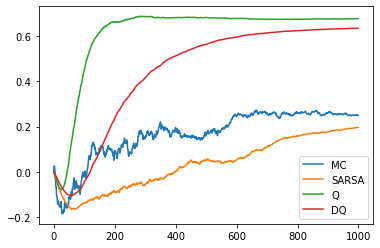

In [308]:
#plottting the estimated expected return from state 8 ( starting state )

plt.plot(range(1000), true_8_MC , label='MC')
plt.plot(range(1000), true_8_SA , label='SARSA')
plt.plot(range(1000), true_8_Q , label='Q')
plt.plot(range(1000), true_8_DQ , label='DQ')

plt.legend()

plt.show()

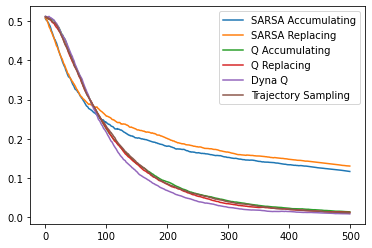

In [325]:
# Plotting the mean absolute error of true values 

true_v = np.array([ 0.78 ,  0.85, 0.93  , 0 ,  0.74 , 0 ,  0.64 , 0 ,  0.67 ,  0.60 ,  0.56 ,  0.39])
true_v = (np.sum(true_v)/12)

error_SAA = -true_mean_SAA+true_v
error_SAR = -true_mean_SAR+true_v
error_QA = -true_mean_QA+true_v
error_QR = -true_mean_QR+true_v
error_QD = -true_mean_QD+true_v
error_TS = -true_mean_TS+true_v

plt.plot(range(500), error_SAA , label='SARSA Accumulating')
plt.plot(range(500), error_SAR , label='SARSA Replacing')
plt.plot(range(500), error_QA , label='Q Accumulating')
plt.plot(range(500), error_QR , label='Q Replacing')
plt.plot(range(500), error_QD , label='Dyna Q')
plt.plot(range(500), error_TS , label='Trajectory Sampling')

plt.legend()

plt.show()

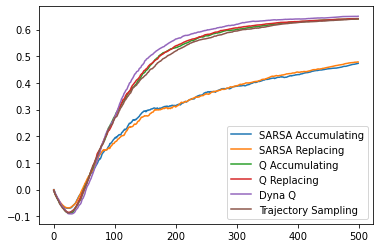

In [326]:
#plottting the estimated expected return from state 8 ( starting state )

plt.plot(range(500), true_8_SAA , label='SARSA Accumulating')
plt.plot(range(500), true_8_SAR , label='SARSA Replacing')
plt.plot(range(500), true_8_QA , label='Q Accumulating')
plt.plot(range(500), true_8_QR , label='Q Replacing')
plt.plot(range(500), true_8_QD , label='Dyna Q')
plt.plot(range(500), true_8_TS , label='Trajectory Sampling')

plt.legend()

plt.show()